## Libarires And DATA Uploading

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.preprocessing import StandardScaler

In [3]:
data= pd.read_csv('/content/creditcard.csv')
data.head(5)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0.0
1,0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0.0
2,1,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0.0
3,1,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0.0
4,2,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0.0


## Data Balancment

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 81299 entries, 0 to 81298
Data columns (total 31 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Time    81299 non-null  int64  
 1   V1      81299 non-null  float64
 2   V2      81299 non-null  float64
 3   V3      81299 non-null  float64
 4   V4      81299 non-null  float64
 5   V5      81299 non-null  float64
 6   V6      81298 non-null  float64
 7   V7      81298 non-null  float64
 8   V8      81298 non-null  float64
 9   V9      81298 non-null  float64
 10  V10     81298 non-null  float64
 11  V11     81298 non-null  float64
 12  V12     81298 non-null  float64
 13  V13     81298 non-null  float64
 14  V14     81298 non-null  float64
 15  V15     81298 non-null  float64
 16  V16     81298 non-null  float64
 17  V17     81298 non-null  float64
 18  V18     81298 non-null  float64
 19  V19     81298 non-null  float64
 20  V20     81298 non-null  float64
 21  V21     81298 non-null  float64
 22

In [5]:
data.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        1
V7        1
V8        1
V9        1
V10       1
V11       1
V12       1
V13       1
V14       1
V15       1
V16       1
V17       1
V18       1
V19       1
V20       1
V21       1
V22       1
V23       1
V24       1
V25       1
V26       1
V27       1
V28       1
Amount    1
Class     1
dtype: int64

In [11]:


# Check for NaN values in the entire DataFrame
nan_locations = data.isna()

# Iterate through the DataFrame and print the location of NaN values
for column in nan_locations.columns:
    for index, is_nan in nan_locations[column].iteritems():
        if is_nan:
            print(f"NaN value found at row {index}, column {column}")

# Alternatively, if you just want to get the indices where NaN values exist:
nan_indices = data.index[data.isna().any(axis=1)].tolist()
print("Indices with NaN values:", nan_indices)


<ipython-input-11-8e25f7797291>:6: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for index, is_nan in nan_locations[column].iteritems():


NaN value found at row 81298, column V6
NaN value found at row 81298, column V7
NaN value found at row 81298, column V8
NaN value found at row 81298, column V9
NaN value found at row 81298, column V10
NaN value found at row 81298, column V11
NaN value found at row 81298, column V12
NaN value found at row 81298, column V13
NaN value found at row 81298, column V14
NaN value found at row 81298, column V15
NaN value found at row 81298, column V16
NaN value found at row 81298, column V17
NaN value found at row 81298, column V18
NaN value found at row 81298, column V19
NaN value found at row 81298, column V20
NaN value found at row 81298, column V21
NaN value found at row 81298, column V22
NaN value found at row 81298, column V23
NaN value found at row 81298, column V24
NaN value found at row 81298, column V25
NaN value found at row 81298, column V26
NaN value found at row 81298, column V27
NaN value found at row 81298, column V28
NaN value found at row 81298, column Amount
NaN value found a

In [12]:

# Drop rows containing NaN values
data_cleaned = data.dropna()

# Save the cleaned DataFrame to a new CSV file
cleaned_file_path = 'cleaned_file.csv'
data_cleaned.to_csv(cleaned_file_path, index=False)

print(f"Rows with NaN values removed. Cleaned data saved to {cleaned_file_path}.")


Rows with NaN values removed. Cleaned data saved to cleaned_file.csv.


In [14]:
data_cleaned.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

## Data Visualization

<Axes: >

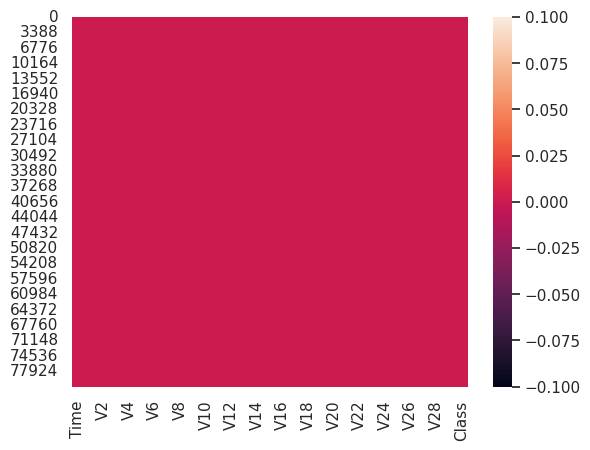

In [32]:
sns.heatmap(data_cleaned.isna())

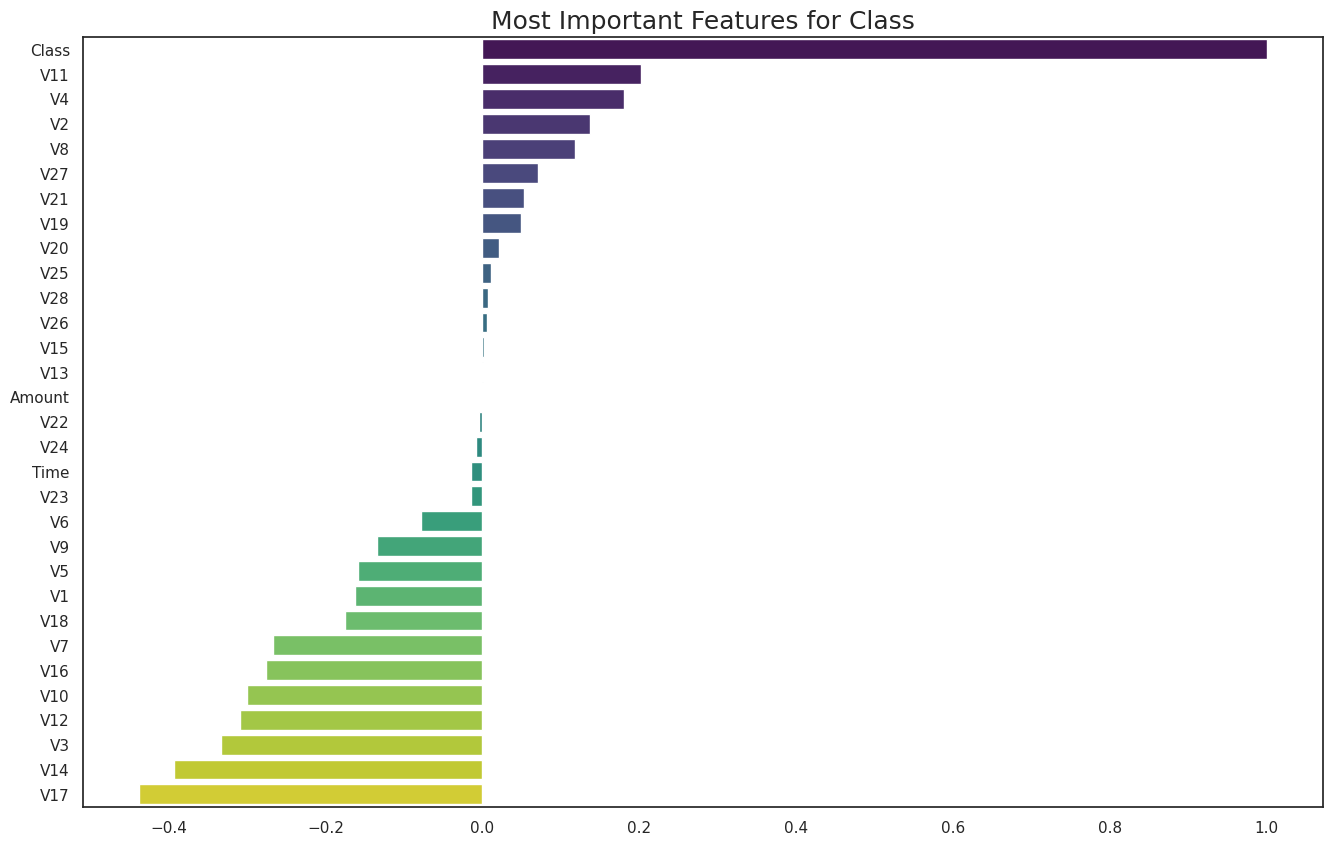

In [17]:
 #Set the style for the plot
sns.set(style="white")
plt.figure(figsize=(16, 10))

# Calculate correlation matrix
corr_matrix = data_cleaned.corr()

# Choose your target variable (assuming 'target_variable' is your target variable)
target_variable = "Class"

# Extract correlations with the target variable
correlations = corr_matrix[target_variable].sort_values(ascending=False)

# Create a bar plot for the most important features
sns.barplot(x=correlations.values, y=correlations.index, palette="viridis")

# Set plot title
plt.title(f"Most Important Features for {target_variable}", fontsize=18)

# Display the plot
plt.show()

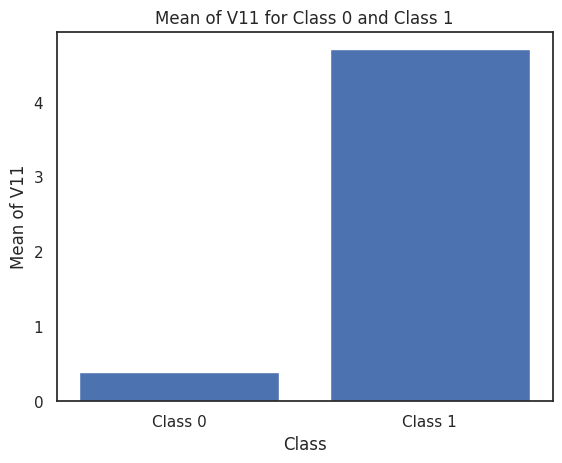

In [36]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming df is your DataFrame
# Selecting samples where Class is 0 or 1
class_0_samples = data[data["Class"] == 0]
class_1_samples = data[data["Class"] == 1]

# Plotting a bar chart for the mean of the "V11" column for each class
plt.bar(['Class 0', 'Class 1'], [class_0_samples['V11'].mean(), class_1_samples['V11'].mean()])
plt.xlabel('Class')
plt.ylabel('Mean of V11')
plt.title('Mean of V11 for Class 0 and Class 1')
plt.show()


## Trying StandardScaler

In [33]:
# Importing the StandardScaler from scikit-learn
from sklearn.preprocessing import StandardScaler

# Creating an instance of StandardScaler
std_scaler = StandardScaler()

# Selecting specific columns for feature 'f' and target 't'
f = data_cleaned[
    [
        "V14",
        "V4",
        "V10",
        "V12",
        "V17",
        "V3",
        "V11",
        "V2",
        "V16",
        "V7",
        "V21",
        "Amount",
        "V1",
        "V20",
        "V8",
        "V27",
        "V19",
    ]
]

t = data_cleaned["Class"]

# Scaling the 'Amount' column using StandardScaler
f["Amount"] = std_scaler.fit_transform(f["Amount"].values.reshape(-1, 1))

# Displaying the transformed feature 'X'
f

<ipython-input-33-b2d393e7557d>:33: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  f["Amount"] = std_scaler.fit_transform(f["Amount"].values.reshape(-1, 1))


,V14,V4,V10,V12,V17,V3,V11,V2,V16,V7,V21,Amount,V1,V20,V8,V27,V19
0,-0.311169,1.378155,0.090794,-0.617801,0.207971,2.536347,-0.551600,-0.072781,-0.470401,0.239599,-0.018307,0.191100,-1.359807,0.251412,0.098698,0.133558,0.403993
1,-0.143772,0.448154,-0.166974,1.065235,-0.114805,0.166480,1.612727,0.266151,0.463917,-0.078803,-0.225775,-0.353875,1.191857,-0.069083,0.085102,-0.008983,-0.145783
2,-0.165946,0.379780,0.207643,0.066084,1.109969,1.773209,0.624501,-1.340163,-2.890083,0.791461,0.247998,1.040628,-1.358354,0.524980,0.247676,-0.055353,-2.261857
3,-0.287924,-0.863291,-0.054952,0.178228,-0.684093,1.792993,-0.226487,-0.185226,-1.059647,0.237609,-0.108300,0.094219,-0.966272,-0.208038,0.377436,0.062723,-1.232622
4,-1.119670,0.403034,0.753074,0.538196,-0.237033,1.548718,-0.822843,0.877737,-0.451449,0.592941,-0.009431,-0.104254,-1.158233,0.408542,-0.270533,0.219422,0.803487
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
81293,-0.337530,-0.478904,0.732665,0.079487,-0.930547,1.048307,0.758889,-0.111155,-0.172853,1.431499,-0.271762,-0.272053,-1.301472,-0.043230,-0.924744,-0.808243,1.859563
81294,0.147409,-0.528821,0.574468,-0.069478,0.209936,0.271719,-0.257585,-0.900171,-1.451743,-0.366603,-0.384664,0.132274,1.104942,-0.250295,-0.121795,-0.062583,-1.158044
81295,0.094443,0.454998,-0.069163,-0.004582,-0.727416,2.440138,1.176537,0.492120,0.432494,0.115241,0.263317,-0.297646,-0.438214,-0.044129,0.232635,0.032011,-0.606472
81296,-0.071706,-0.019309,-0.393626,0.842432,-0.071068,1.704117,0.338078,1.109975,-0.251258,0.718295,-0.165078,-0.360552,-0.473593,0.134036,-0.023019,0.291547,-0.476005


In [34]:
from sklearn.model_selection import train_test_split
# train - 70
# test - 30
X = f
Y = t
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.30)

# Splitting And Models Testing

In [35]:
from sklearn.model_selection import train_test_split
# train - 70
# test - 30
X = data_cleaned.drop(columns=['Class'])
Y = data_cleaned['Class']
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.30)

In [20]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report

# Assuming you have features x_train, x_test, and target variables y_train, y_test

# Logistic Regression model
logreg_model = LogisticRegression()
logreg_model.fit(x_train, y_train)

# Make predictions on the testing data
y_pred_logreg = logreg_model.predict(x_test)

# Print the accuracy
accuracy = logreg_model.score(x_test, y_test) * 100
print("Accuracy: {:.2f}%".format(accuracy))

# Print the classification report
print("Logistic Regression Classification Report:")
print(classification_report(y_test, y_pred_logreg))


Accuracy: 99.85%
Logistic Regression Classification Report:
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00     24330
         1.0       0.70      0.70      0.70        60

    accuracy                           1.00     24390
   macro avg       0.85      0.85      0.85     24390
weighted avg       1.00      1.00      1.00     24390



/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [21]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report

# Assuming you have features x_train, x_test, and target variables y_train, y_test

# Decision tree model
dt_model = DecisionTreeClassifier()
dt_model.fit(x_train, y_train)

# Make predictions on the testing data
y_pred_dt = dt_model.predict(x_test)

# Print out a classification report
print("Decision Tree Classification Report:")
print(classification_report(y_test, y_pred_dt))


Decision Tree Classification Report:
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00     24330
         1.0       0.89      0.80      0.84        60

    accuracy                           1.00     24390
   macro avg       0.94      0.90      0.92     24390
weighted avg       1.00      1.00      1.00     24390



In [24]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report

# Assuming you have features X and target variable y
# Split the data into training and testing sets

# Random Forest model
rf_model = RandomForestClassifier()
rf_model.fit(x_train, y_train)

# Make predictions on the testing data
y_pred_rf = rf_model.predict(x_test)

# Print out a classification report
print("Random Forest Classification Report:")
print(classification_report(y_test, y_pred_rf))

Random Forest Classification Report:
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00     24330
         1.0       0.96      0.82      0.88        60

    accuracy                           1.00     24390
   macro avg       0.98      0.91      0.94     24390
weighted avg       1.00      1.00      1.00     24390

